In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [12]:
# convert string representation of list to actual list, checking for null values

import ast


df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else (x if isinstance(x, list) else [])
)
df[['job_title_short','job_skills']].head()


,job_title_short,job_skills
0,Senior Data Engineer,[]
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [18]:
# applying the explode funtion on each skill and make each skill have its own row
df_exploded = df.explode('job_skills')
df_exploded['job_skills'].head(10)


0         NaN
1           r
1      python
1         sql
1       nosql
1    power bi
1     tableau
2      python
2         sql
2          c#
Name: job_skills, dtype: object

<Axes: ylabel='job_skills'>

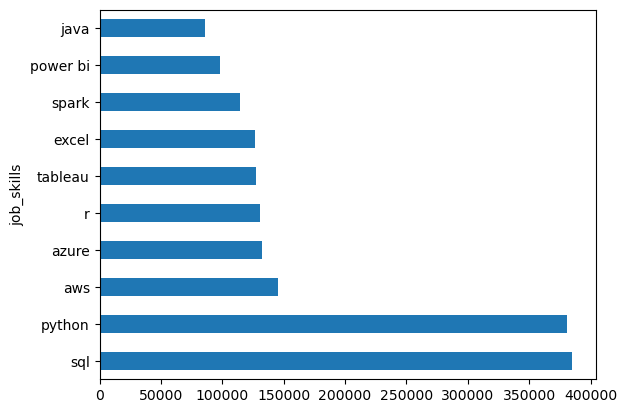

In [19]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='barh')

In [49]:
# calculate and clean up the skill counts

df_skills = df.explode('job_skills')



In [52]:
df_skills = df_skills.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,NaN,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [53]:
# group by job_skills and job_title_short to get counts
skill_counts = df_skills.groupby(['job_skills', 'job_title_short']).size()
skill_counts

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [35]:

# Name the count column as count
df_skill_counts = skill_counts.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skill_counts

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [46]:
# preparing to plot the dat ain descending order
df_skill_counts.sort_values(by='skill_count', inplace=True, ascending=False)
df_skill_counts

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
834,ionic,Business Analyst,1
971,linode,Senior Data Analyst,1
1422,powerbi,Machine Learning Engineer,1
927,kali,Senior Data Scientist,1


In [47]:
# plotting the top 10 skills with specific job titles
job_title = 'Data Analyst'
head_value = 10
df_skill_final = df_skill_counts[df_skill_counts['job_title_short'] == job_title].head(head_value)
df_skill_final

,job_skills,job_title_short,skill_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380
1516,r,Data Analyst,29996
1635,sas,Data Analyst,27998
1429,powerpoint,Data Analyst,13822
2198,word,Data Analyst,13562
1625,sap,Data Analyst,11280


<Axes: title={'center': 'Top 10 skills for Data Analyst'}, ylabel='job_skills'>

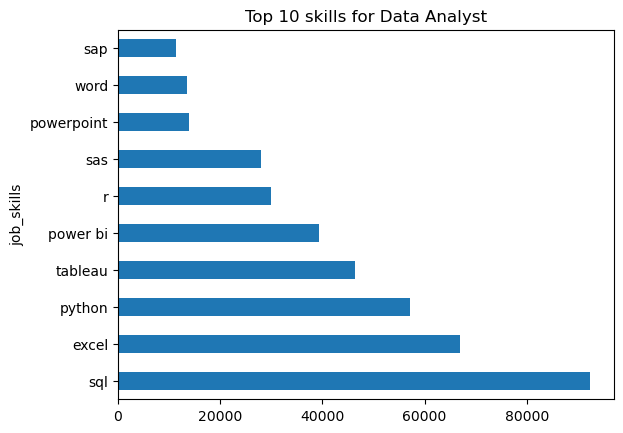

In [48]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count', legend=False, title=f'Top {head_value} skills for {job_title}')

In [57]:
# plotting the top 10 skills with specific job titles
job_title = 'Data Scientist'
head_value = 10
df_skill_final1 = df_skill_counts[df_skill_counts['job_title_short'] == job_title].head(head_value)
df_skill_final1

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1823,sql,Data Scientist,78982
1518,r,Data Scientist,59566
1637,sas,Data Scientist,29534
1943,tableau,Data Scientist,29445
142,aws,Data Scientist,26256
1773,spark,Data Scientist,24286
152,azure,Data Scientist,21664
1953,tensorflow,Data Scientist,19153
560,excel,Data Scientist,17545


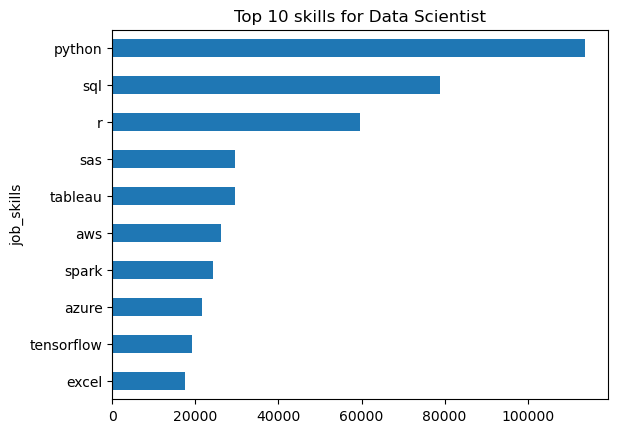

In [ ]:
ax= df_skill_final1.plot(kind='barh', x='job_skills', y='skill_count', legend=False, title=f'Top {head_value} skills for {job_title}')
ax.invert_yaxis()